# Airline On-Time Presentation

## by Aniekan Inyang


## Investigation Overview

For this investigation, I will be looking at the characteristics of the major causes of delay for both arrival and departure. Also, look at the degree of the causes of the delay .

## Dataset Overview

This dataset reports flights in the United States, including
carriers, arrival and departure delays, and reasons for delays,
from 2004 to 2008.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# loading datasets and combing it to a single dataframe
join_flight_df=[] #Initializing dataframes list
for file in glob.glob("*.csv"):    
    df = pd.read_csv(file, encoding='latin-1')    
    join_flight_df.append(df)
    
flights_df = pd.concat(join_flight_df, ignore_index=True)

In [3]:
#data cleaning renaming column names
flights_df.rename(columns={'Year':'year', 'Month': 'month', 'DayofMonth':'day_of_month','DayOfWeek':'day_of_week',
                           'DepTime':'departure_time', 'CRSDepTime':'crs_dep_time','ArrTime':'arrival_time', 'CRSArrTime':'crs_arrival_time',
                           'UniqueCarrier':'unique_carrier','FlightNum':'flight_num', 'TailNum':'tail_num','ActualElapsedTime':'actual_elapsed_time',
                           'CRSElapsedTime':'crs_elapsed_time', 'AirTime':'air_time', 'ArrDelay':'arrival_delay','DepDelay':'departure_delay',
                           'Origin':'origin', 'Dest':'destination', 'Distance':'distance','TaxiIn':'taxi_in', 'TaxiOut':'taxi_out',
                           'Cancelled':'cancelled', 'CancellationCode':'cancellation_code','Diverted':'diverted', 'CarrierDelay':'carrier_delay',
                           'WeatherDelay':'weather_delay','NASDelay':'nas_delay', 'SecurityDelay':'security_delay', 'LateAircraftDelay':'late_aircraft_delay'},
                  inplace=True
                 )

In [4]:
flights_df.drop_duplicates(inplace=True)

In [5]:
# color scheme for seaborn charts going forward
sns.set_style('darkgrid') # set grid color
sns.set_palette('Set1') # set color palette
color = sns.color_palette()[1]

## Distribution of Arrival delays

The arrival delay dataset takes on a range of values, between -100 and 300. The distribution of arrival delays is unimodal and skewed to the right. 

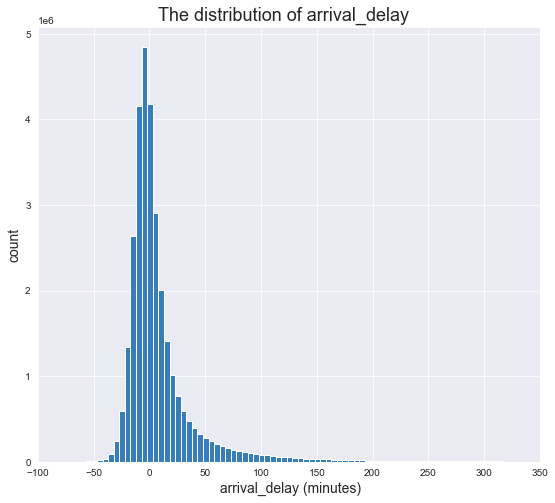

In [6]:
def delay_hist(delay_type):
    ''' This function plots the delays distribution histogram based on passed delay type'''
    plt.figure(figsize=(9, 8))
    binsize = 5
    start = flights_df[delay_type].min()
    stop = flights_df[delay_type].max()
    bins = np.arange(start,stop + 5,5)
    
    plt.hist(data = flights_df, x = delay_type,color=color, bins = bins)
    plt.xlim(-100,350)
    plt.title('The distribution of {}  '.format(delay_type), fontsize=18);
    plt.xlabel(' {} (minutes)'.format(delay_type),fontsize=14)
    plt.ylabel('count', fontsize=14)
    plt.show()
    
#Plotting distribution of arrival delay    
delay_hist('arrival_delay');

## Distribution of Departure delays

The departure delay dataset takes on range of values, between -25 and 250. The distribution of departure delays is unimodal and also skewed to the right.

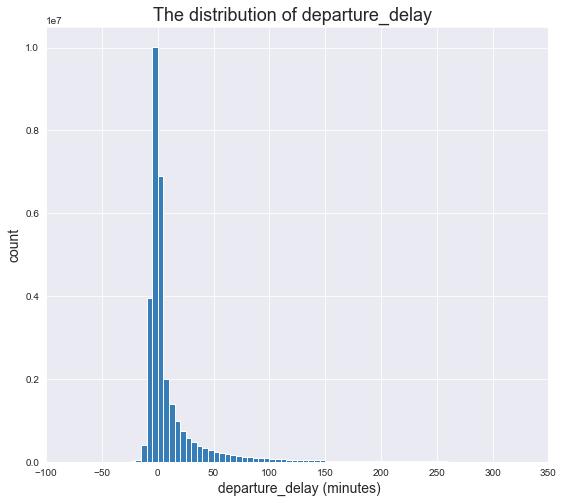

In [7]:
delay_hist('departure_delay');

## Average Delay Causes 
Considering the top 5 airport that experinces highest delay due to arrival, 
Hartsfield-Jackson Atlanta International(ATL) experienced more arrival delays as a result of a carrier delay, Dallas/Fort Worth International (DFW), Los Angeles International (LAX), and Chicago O'Hare International (ORD) experienced more delays from late aircraft. while IAH expericed more delay as a result of national air security delay

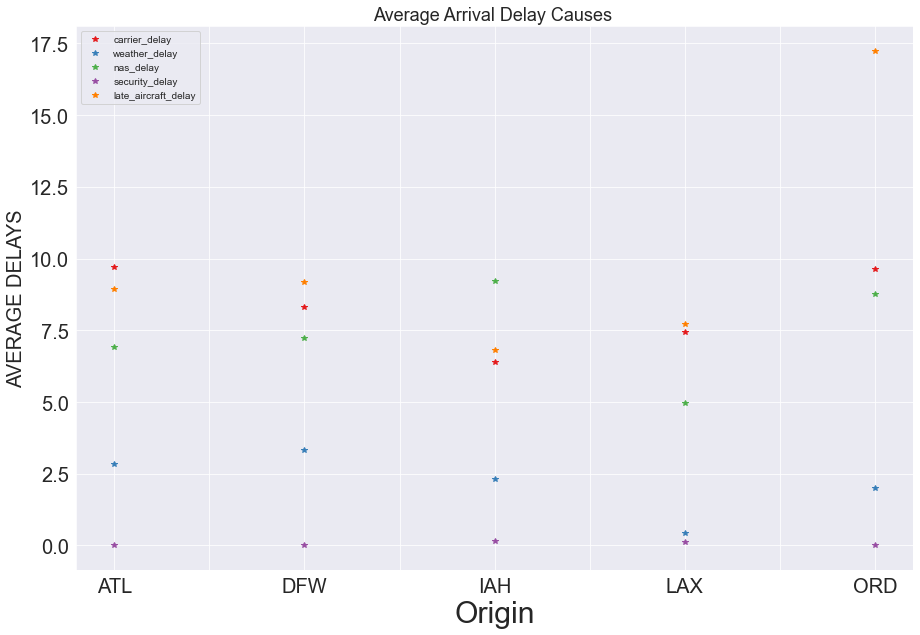

In [8]:
arrival_delay_df = flights_df.loc[:,['year','month','origin','arrival_delay','carrier_delay','weather_delay',
                                 'nas_delay','security_delay','late_aircraft_delay']].query('arrival_delay > 0')

arrival_city_delay = arrival_delay_df.query("origin in ['ATL','ORD','DFW','LAX','IAH']").groupby(
    'origin')[['carrier_delay','weather_delay',
                                'nas_delay','security_delay','late_aircraft_delay']].mean().reset_index()


arrival_city_delay.plot(x = 'origin',figsize = [15,10], linestyle = '', marker = '*')
plt.legend()
plt.title('Average Arrival Delay Causes ', fontsize=18);
plt.ylabel('AVERAGE DELAYS',fontsize=20)
plt.xticks(rotation=0,fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel('Origin', fontsize=30);

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [9]:
!jupyter nbconvert Airline_On_Time_Performance_slide.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Airline_On_Time_Performance_slidee.ipynb to slides
[NbConvertApp] Writing 582688 bytes to Airline_On_Time_Performance_slidee.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Airline_On_Time_Performance_slidee.slides.html
Use Control-C to stop this server
^C

Interrupted
